In [1]:
import Quandl
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

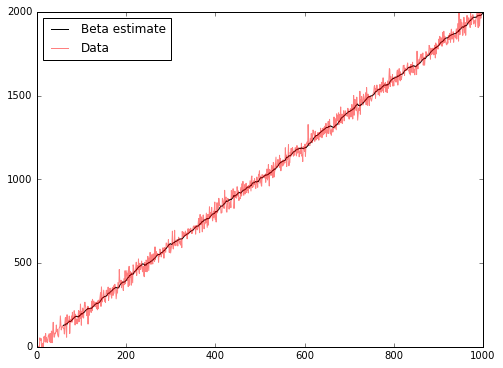

In [2]:
import stockSelection
import beta_hedging
import get_beta
import get_beta_demo

In [4]:
!cat get_beta_demo.py

import numpy as np
import matplotlib.pyplot as plt
from get_beta import get_beta

# Demonstrate how get_beta works using some noisy synthetic data
X = np.arange(1000)
Y = 2*X + np.random.normal(scale=30, size=1000)
r = get_beta(Y, X)
alphas, betas = r[0], r[1]
plt.figure(figsize=(8,6));
plt.plot(X[60:], alphas + X[60:]*betas, color='k', label='Beta estimate');
plt.plot(X, Y, color='r', alpha=0.5, label='Data')
plt.legend(loc=0);
plt.xlim(0, 1000);
plt.ylim(0, 2000);
plt.show();


---

In [59]:
market = stockSelection.getStocks(['INDEX_GSPC'])['INDEX_GSPC']

['INDEX_GSPC']
INDEX_GSPC


In [60]:
market.columns = ['SP500']

In [61]:
market.head()

,SP500
Date,
2005-01-03,1202.079956
2005-01-04,1188.050049
2005-01-05,1183.739990
2005-01-06,1187.890015
2005-01-07,1186.189941


In [3]:
stock_universe = stockSelection.getStockUniverse()

In [50]:
random_portfolio = stockSelection.getSamplePortfolio(stock_universe, n=20)

Top 5 rows of selected portfolio:
     Symbol                           Name  MarketCap                 Sector  \
859      PF           Pinnacle Foods, Inc.       5050  Consumer Non-Durables   
1273   SINA               Sina Corporation       2650             Technology   
361     MAR         Marriott International      17270      Consumer Services   
1011    CSC  Computer Sciences Corporation       3940             Technology   
538    BRFS                       BRF S.A.       9880  Consumer Non-Durables   

                                     industry  Market  
859                            Packaged Foods    NYSE  
1273  Computer Software: Prepackaged Software  NASDAQ  
361                            Hotels/Resorts  NASDAQ  
1011                             EDP Services    NYSE  
538                         Meat/Poultry/Fish    NYSE  


In [32]:
random_portfolio = ['MAR',
 'AYI',
 'SHW',
 'LUX',
 'LFL',
 'CSC',
 'SON',
 'CBS',
 'CNO',
 'DNP',
 'CATY',
 'BRFS',
 'BBT',
 'SINA']

In [33]:
port = stockSelection.getStocks(random_portfolio)

['MAR', 'AYI', 'SHW', 'LUX', 'LFL', 'CSC', 'SON', 'CBS', 'CNO', 'DNP', 'CATY', 'BRFS', 'BBT', 'SINA']
MAR AYI SHW LUX LFL CSC SON CBS CNO DNP CATY BRFS BBT SINA


In [62]:
del port['ATHN']
del port['PF']
del port['DFS']

In [63]:
port.keys()

['MAR',
 'AYI',
 'SHW',
 'LUX',
 'LFL',
 'CSC',
 'SON',
 'CBS',
 'CNO',
 'DNP',
 'CATY',
 'BRFS',
 'BBT',
 'SINA']

In [35]:
portdf = pd.concat(port, axis=1, join='inner')

In [36]:
portdf.columns = [u'AYI', u'BBT', u'BRFS', u'CATY', u'CBS', u'CNO', u'CSC', u'DNP', u'LFL', u'LUX', u'MAR', u'SHW', u'SINA', u'SON']

In [30]:
#replace with market2, following what's way below
market = market2dfs

In [37]:
# join to reduce the market date keys
portdf = pd.concat([portdf, market], axis=1, join='inner')

In [38]:
market = portdf[['Market2']]

In [39]:
del portdf['Market2']

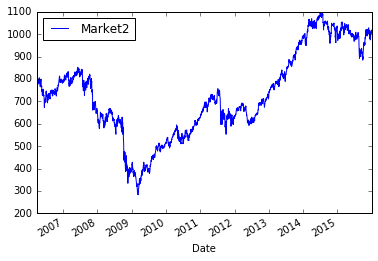

In [40]:
market.plot()
plt.savefig('market2.png')

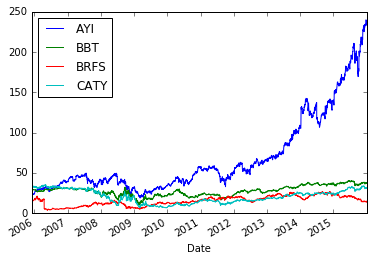

In [84]:
portdf[[u'AYI', u'BBT', u'BRFS', u'CATY']].plot()
plt.savefig('port_p1.png')

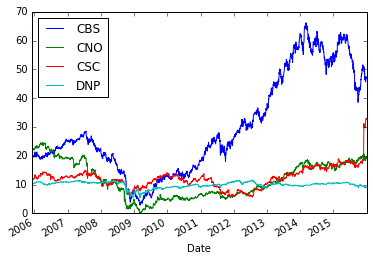

In [85]:
portdf[[ u'CBS', u'CNO', u'CSC', u'DNP',]].plot()
plt.savefig('port_p2.png')

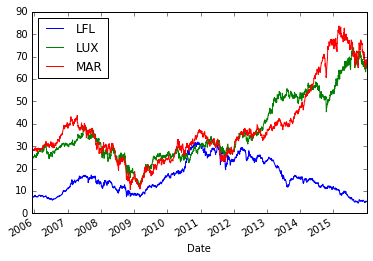

In [86]:
portdf[[u'LFL', u'LUX', u'MAR']].plot()
plt.savefig('port_p3.png')

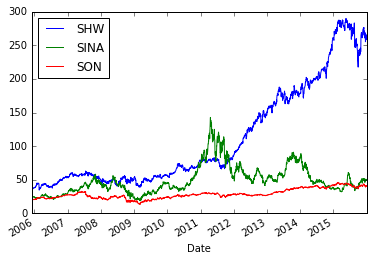

In [87]:
portdf[[u'SHW', u'SINA', u'SON']].plot()
plt.savefig('port_p4.png')

In [41]:
port_val = portdf.sum(axis=1)

In [42]:
def getReturn(p):
    """
    Get return from list of prices.
    """
    return [(p[i+1]-p[i])/p[i] for i in range(len(p)-1)]

In [63]:
port_ret = getReturn(port_val)
market_ret = getReturn(market.Market2.values)

AttributeError: 'DataFrame' object has no attribute 'Market2'

In [44]:
len(port_ret) == len(market_ret)

True

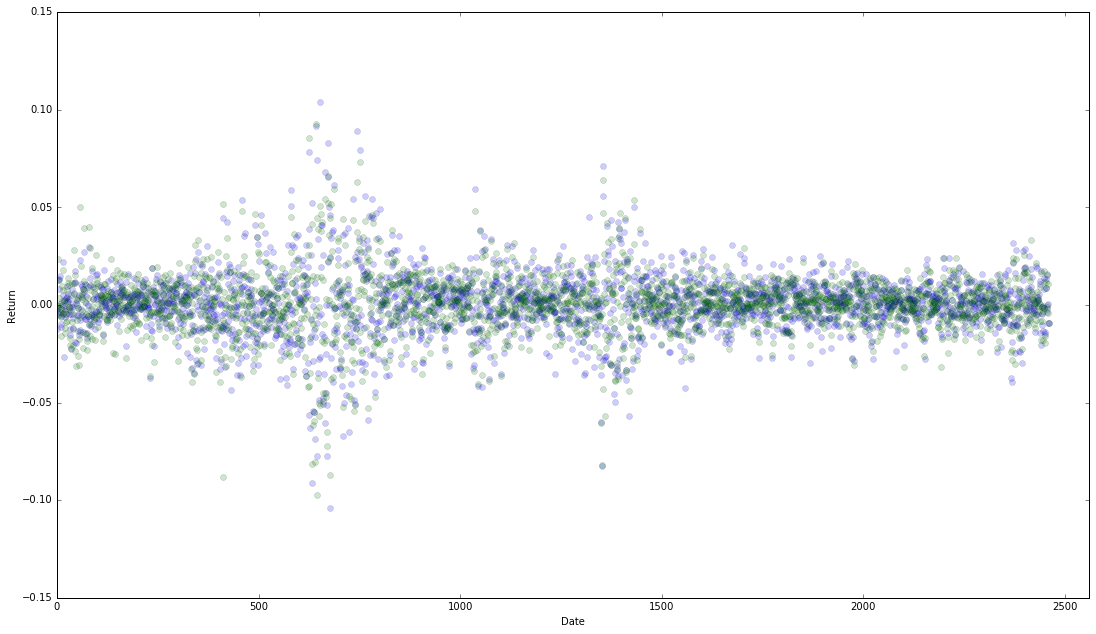

In [45]:
plt.plot(port_ret, linestyle = '', marker = 'o', alpha = 0.2, label = 'Portfolio')
plt.plot(market_ret, linestyle = '', marker = 'o', alpha = 0.2, label = 'Market')
plt.xlim([0,2560])
plt.xlabel('Date')
plt.ylabel('Return')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('Portfolio returns2.png')

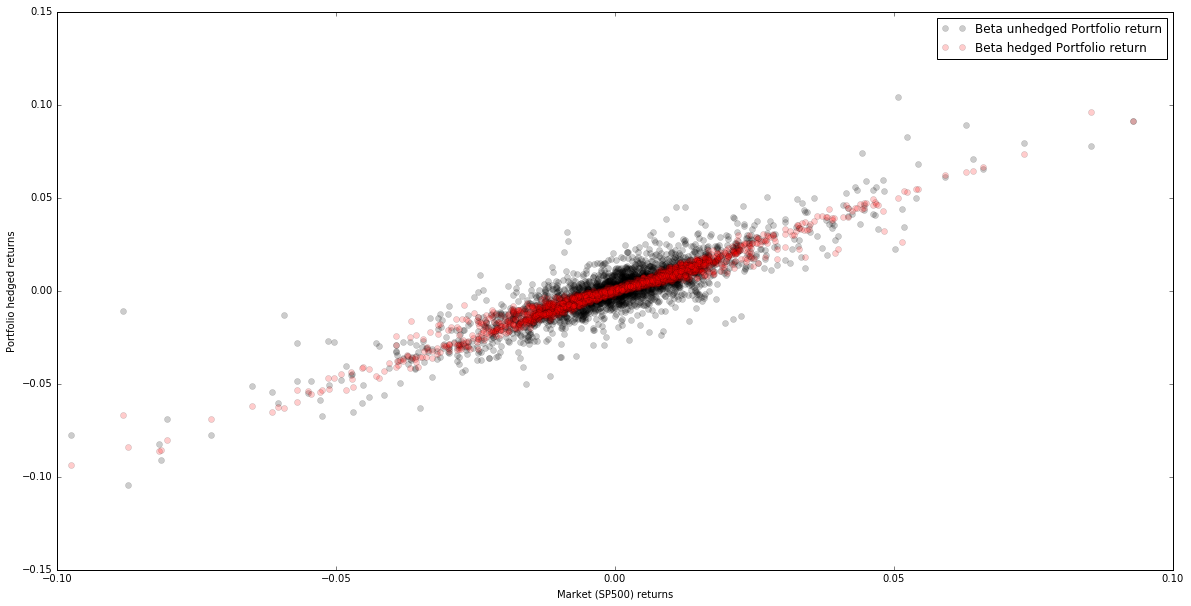

In [48]:
# From Jonathan's get_beta demo
Y = port_ret
X = market_ret
r = get_beta.get_beta(Y, X)
alphas, betas = r[0], r[1]
plt.figure(figsize=(20,10));
plt.plot(X, Y, color='k', alpha=0.2, linestyle = '', marker = 'o', label='Beta unhedged Portfolio return')
plt.plot(X[60:], alphas + X[60:]*betas, color='r', alpha = 0.2, linestyle = '', marker = 'o',label='Beta hedged Portfolio return');
plt.legend(loc=0);
plt.xlabel('Market (SP500) returns')
plt.ylabel('Portfolio hedged returns')
plt.savefig('beta2.png')

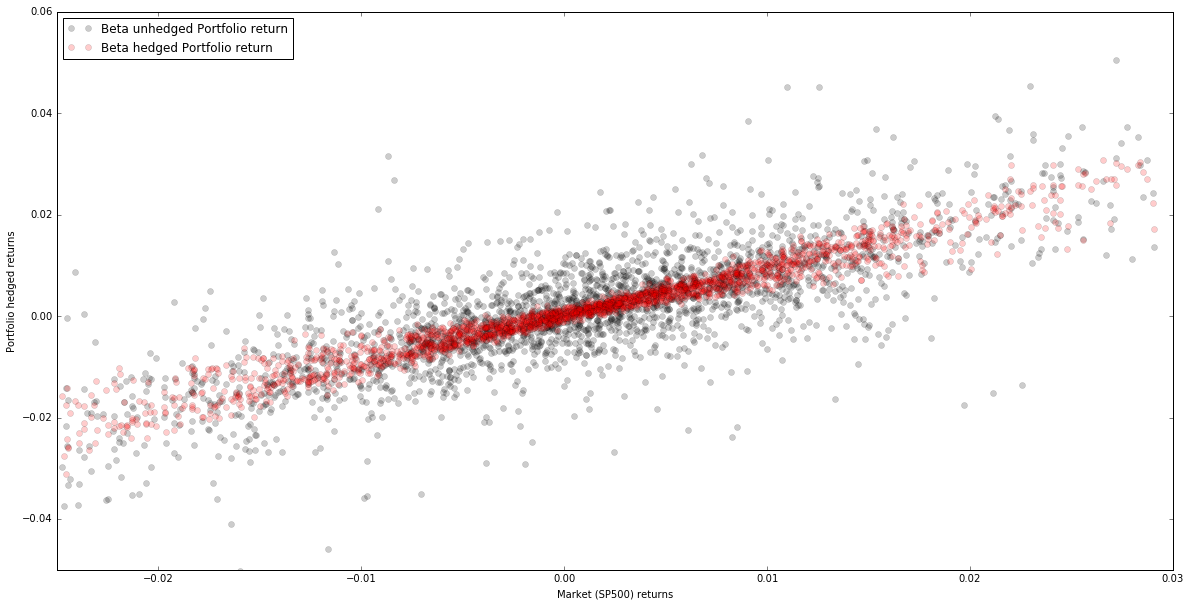

In [49]:
plt.figure(figsize=(20,10));
plt.plot(X, Y, color='k', alpha=0.2, linestyle = '', marker = 'o', label='Beta unhedged Portfolio return')
plt.plot(X[60:], alphas + X[60:]*betas, color='r', alpha = 0.2, linestyle = '', marker = 'o',label='Beta hedged Portfolio return');
plt.legend(loc=0);
plt.xlabel('Market (SP500) returns')
plt.ylabel('Portfolio hedged returns')
plt.xlim([-0.025,0.03])
plt.ylim([-0.05,0.06])
plt.savefig('beta_zoomin2.png')

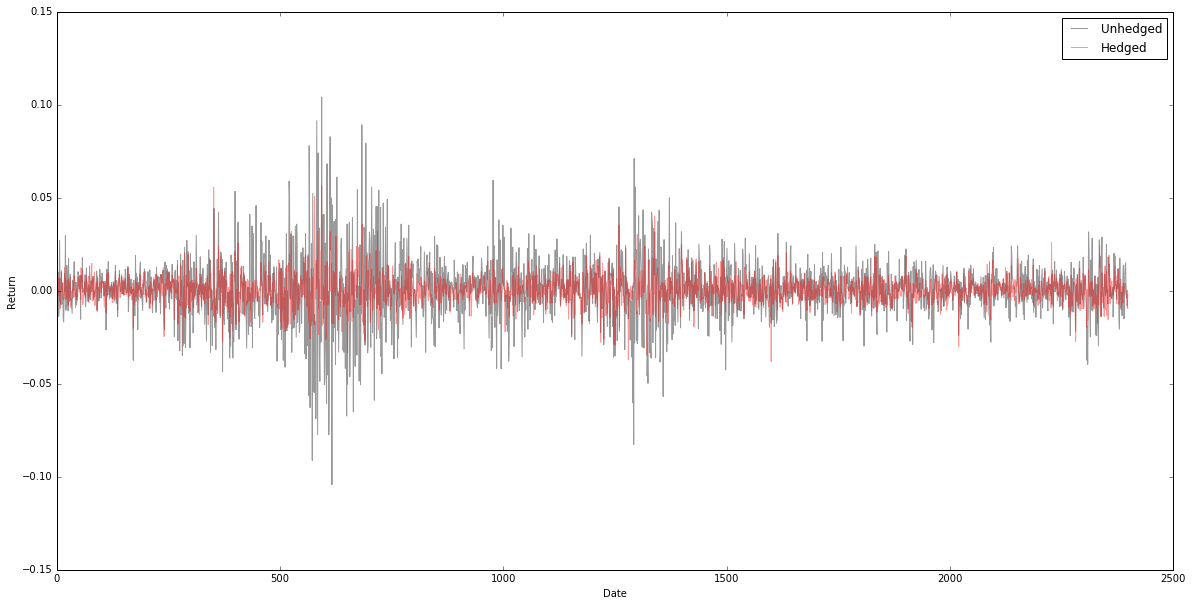

In [50]:
plt.figure(figsize=(20,10));
plt.plot(Y[60:], color='k', alpha = 0.4, label='Unhedged');
plt.plot(Y[60:]-(X[60:]*betas), color='r', alpha = 0.4, label='Hedged');
plt.legend(loc=0);
plt.xlabel('Date')
plt.ylabel('Return')
plt.savefig('beta_hedged_return2.png')

In [51]:
import numpy as np

In [52]:
np.std(Y[60:])

0.016398301783015806

In [53]:
np.mean(Y[60:])

0.00059052337743471491

In [55]:
np.mean(np.abs(Y[60:]))

0.011264988558746627

In [56]:
np.mean(Y[60:]-(X[60:]*betas))

0.00032455537069765332

In [57]:
np.mean(np.abs(Y[60:]-(X[60:]*betas)))

0.0057451552246944012

In [58]:
np.std(Y[60:]-(X[60:]*betas))

0.0080239125953933833

---

In [4]:
random_portfolio2 = stockSelection.getSamplePortfolio(stock_universe, n=20)

Top 5 rows of selected portfolio:
    Symbol                               Name  MarketCap            Sector  \
367    MTB               M&T Bank Corporation      16900           Finance   
643    GAS                AGL Resources, Inc.       7800  Public Utilities   
564    LLL  L-3 Communications Holdings, Inc.       9320        Technology   
225    HAL                Halliburton Company      28160            Energy   
684   ETFC      E*TRADE Financial Corporation       7100           Finance   

                                              industry  Market  
367                                        Major Banks    NYSE  
643                               Oil/Gas Transmission    NYSE  
564  Radio And Television Broadcasting And Communic...    NYSE  
225                        Oilfield Services/Equipment    NYSE  
684                               Savings Institutions  NASDAQ  


In [6]:
market2 = stockSelection.getStocks(random_portfolio2)

['MTB' 'GAS' 'LLL' 'HAL' 'ETFC' 'FLIR' 'MORN' 'WYNN' 'RLI' 'MRO' 'WAL'
 'BSMX' 'AGNC' 'BMA' 'INGR' 'GIB' 'SAP' 'BKH' 'ARMK' 'NJR']
MTB GAS LLL HAL ETFC FLIR MORN WYNN RLI MRO WAL BSMX AGNC BMA INGR GIB SAP BKH ARMK NJR


In [8]:
for keys in market2:
    print keys, market2[keys].shape

AGNC (1922, 1)
ETFC (2769, 1)
WAL (2644, 1)
HAL (2769, 1)
ARMK (517, 1)
BKH (2769, 1)
RLI (2769, 1)
BSMX (821, 1)
GAS (2769, 1)
FLIR (2769, 1)
NJR (2769, 1)
MRO (2769, 1)
MORN (2686, 1)
BMA (2476, 1)
LLL (2769, 1)
MTB (2769, 1)
WYNN (2769, 1)
SAP (2784, 1)
INGR (2769, 1)
GIB (2769, 1)


In [18]:
del market2['AGNC']
del market2['BSMX']
del market2['ARMK']

KeyError: 'AGNC'

In [20]:
market2df = pd.concat(market2, axis=1, join='inner')

In [21]:
market2df

,BKH,BMA,ETFC,FLIR,GAS,GIB,HAL,INGR,LLL,MORN,MRO,MTB,NJR,RLI,SAP,WAL,WYNN
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,
2006-03-24,22.438449,23.35,258.500004,13.022332,22.895019,7.230000,31.539527,24.768151,70.631979,40.768385,18.064454,84.761285,10.592285,15.649367,52.21,35.150002,44.091237
2006-03-27,22.166506,23.05,257.399998,13.345663,22.907886,7.250000,31.690030,24.861167,70.385161,40.643450,18.263092,84.629691,10.573258,15.748503,51.50,35.549999,45.126470
2006-03-28,22.392018,22.38,255.700001,13.073877,22.997947,7.210000,32.393861,24.784853,70.187700,42.767403,18.228035,83.745086,10.649334,15.816482,51.46,36.200001,45.223331
2006-03-29,22.736919,22.84,268.000004,13.078563,23.242402,6.750000,32.871935,24.844207,71.100938,43.843795,17.984994,83.642735,10.730153,16.151733,52.26,37.020000,46.246458
2006-03-30,22.670593,22.75,267.500004,13.162911,22.985081,6.840000,32.889642,24.844207,70.508567,43.286379,17.996677,83.152908,10.687358,16.293789,53.92,37.000000,46.579429
2006-03-31,22.551204,22.93,269.799992,13.312862,23.190936,6.630000,32.323034,25.073147,70.582616,43.026891,17.800375,83.445341,10.756296,16.279584,54.32,37.150002,46.524941
2006-04-03,22.717022,22.70,266.299992,13.092621,23.190936,6.780000,32.256638,25.615819,70.220610,42.911564,17.924239,83.693911,10.787203,16.208556,54.58,37.400002,45.350469
2006-04-04,22.816514,23.60,272.500004,13.270688,23.126608,7.190000,33.288033,24.674623,70.006697,42.825068,18.256078,83.708530,10.832365,16.265378,55.24,37.630001,46.524941


In [22]:
print market2df.columns

MultiIndex(levels=[[u'BKH', u'BMA', u'ETFC', u'FLIR', u'GAS', u'GIB', u'HAL', u'INGR', u'LLL', u'MORN', u'MRO', u'MTB', u'NJR', u'RLI', u'SAP', u'WAL', u'WYNN'], [u'Close']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [23]:
market2df.columns = [u'BKH', u'BMA', u'ETFC', u'FLIR', u'GAS', u'GIB', u'HAL', u'INGR', u'LLL', u'MORN', u'MRO', u'MTB', u'NJR', u'RLI', u'SAP', u'WAL', u'WYNN']

In [24]:
market2_val = market2df.sum(axis=1)

In [26]:
?pd.DataFrame

In [28]:
market2dfs = pd.DataFrame(market2_val, columns=['Market2'])

In [29]:
market2dfs

,Market2
Date,
2006-03-24,775.662476
2006-03-27,775.090874
2006-03-28,775.209929
2006-03-29,793.344836
2006-03-30,793.067545
2006-03-31,795.697221
2006-04-03,791.729582
2006-04-04,801.755528
2006-04-05,798.711153


In [62]:
np.std(market.SP500.values)

334.96164080378071

In [65]:
np.std(getReturn(market.SP500.values))

0.012616063996926835